In [ ]:
import pandas as pd
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


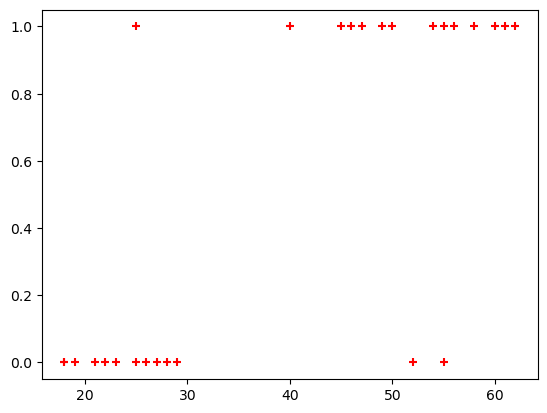

In [ ]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [ ]:
type(df.bought_insurance)

In [ ]:
type(df.age)

pandas.core.series.Series

In [ ]:
type(df[['age']])

pandas.core.frame.DataFrame

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, train_size=0.7, random_state=42)

In [ ]:
X_train

,age
24,50
1,25
4,46
5,56
2,47
15,55
22,40
3,52
25,54
23,45


In [ ]:
X_test

,age
8,62
13,29
9,61
21,26
0,22
11,28
16,25
17,58
12,27


In [ ]:
y_train

24    1
1     0
4     1
5     1
2     1
15    1
22    1
3     0
25    1
23    1
18    0
26    0
20    0
7     1
10    0
14    1
19    0
6     0
Name: bought_insurance, dtype: int64

In [ ]:
y_test

8     1
13    0
9     1
21    0
0     0
11    0
16    1
17    1
12    0
Name: bought_insurance, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
y_predicted

array([1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [ ]:
model.score(X_test,y_test)

0.8888888888888888

In [ ]:
model.predict([[60]])

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

**model.coef_ indicates value of m in y=m*x + b equation**

In [ ]:
model.coef_

array([[0.13575374]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [ ]:
model.intercept_

array([-5.37729898])

In [ ]:
model.predict([[52]])

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

**Lets defined sigmoid function now and do the math with hand**

In [ ]:
import math
def sigmoid(z):
  return 1 / (1 + math.exp(-z))

In [ ]:
def prediction_function(age):
    y = 0.13575374 * age -5.37729898
    x = sigmoid(y)
    #print(y)
    if x <= 0.5:
        return 0
    else:
        return 1

In [ ]:
prediction_function(52)

1

**0.485 is less than 0.5 which means person with 35 age will *not* buy insurance**

**0.485 is more than 0.5 which means person with 43 will buy the insurance**

<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model